# Heart Disease Prediction - Individual Capstone Project




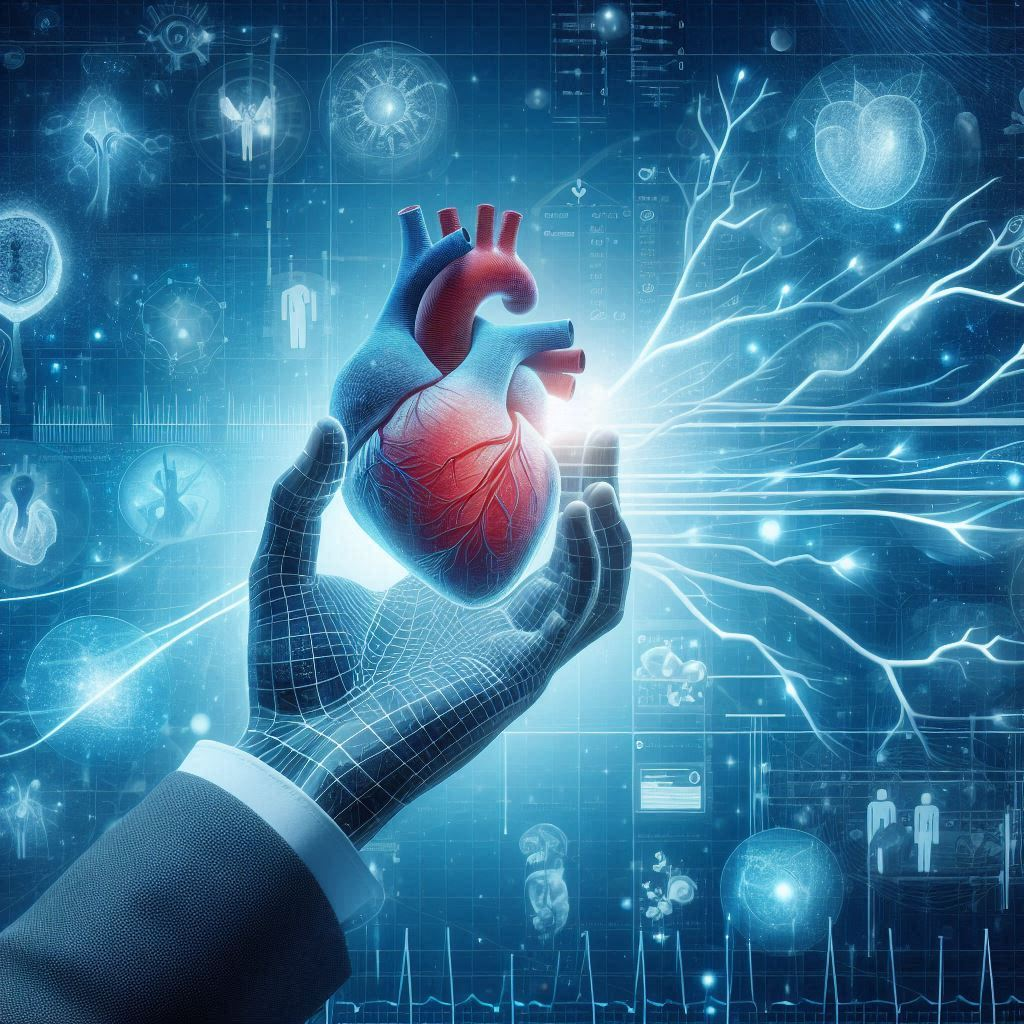

###  Introduction
Heart disease remains one of the leading causes of mortality globally. The goal of this project is to analyze clinical and personal health data to uncover insights and build a machine learning model to predict the presence of heart disease.

### Objectives:
- Explore and visualize patient health features.
- Analyze patterns and correlations with heart disease.
- Build and evaluate a classification model for prediction.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
# loading the dataset

# Load CSV file
Heart_failure = pd.read_csv('heart_dirty.csv')

### Displaying the dataset

In [3]:
Heart_failure.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [4]:
Heart_failure.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
918,58,M,ASY,114.0,318.0,0,ST,140.0,N,4.4,Down,1
919,56,M,ASY,128.0,223.0,0,ST,119.0,Y,2.0,Down,1
920,51,M,ASY,140.0,298.0,0,Normal,122.0,Y,4.2,Flat,1
921,53,M,ASY,180.0,NaN,0,ST,120.0,Y,1.5,Flat,1
922,63,M,ASY,185.0,0.0,0,Normal,98.0,Y,0.0,Up,1


### Finding dataset info

In [5]:
# Display the carbon dataset info
Heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             923 non-null    int64  
 1   Sex             923 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       878 non-null    float64
 4   Cholesterol     876 non-null    float64
 5   FastingBS       923 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           877 non-null    float64
 8   ExerciseAngina  923 non-null    object 
 9   Oldpeak         923 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.7+ KB


In [6]:
# checking the number of rows and columns
Heart_failure.shape

(923, 12)

* *This dataset contains 923 rows and 12 columns*

In [7]:
# display columns
Heart_failure.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Data Cleaning

In [8]:
# Checking for duplicates
Heart_failure[Heart_failure.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
918,58,M,ASY,114.0,318.0,0,ST,140.0,N,4.4,Down,1
919,56,M,ASY,128.0,223.0,0,ST,119.0,Y,2.0,Down,1
920,51,M,ASY,140.0,298.0,0,Normal,122.0,Y,4.2,Flat,1
921,53,M,ASY,180.0,NaN,0,ST,120.0,Y,1.5,Flat,1
922,63,M,ASY,185.0,0.0,0,Normal,98.0,Y,0.0,Up,1


In [9]:
# Checking the number of duplicates in my dataset
Heart_failure.duplicated().sum()

5

*  *This dataset contains 5 duplicates*

In [10]:
# Dropping the duplicates and resetting index
Heart_failure.drop_duplicates(inplace=True)
Heart_failure.reset_index(drop=True)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


*  *Removed 5 duplicated rows*

In [11]:
# checking the shape after removing duplictaes
Heart_failure.shape 

(918, 12)

* *This dataset now contains 918 rows and 12 columns*

In [12]:
# Checking the various datatypes in our dataset
Heart_failure.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

* *This dataset has no data type to be changed*

In [13]:
#Fixing Typos in Categorical Values
#Fixing typos in 'Sex' column
Heart_failure['Sex'] = Heart_failure['Sex'].replace({'Maale' : 'M'})

In [14]:
# Checking all unique values to confirm
Heart_failure['Sex'].unique()

array(['M', 'F'], dtype=object)

In [15]:
#checking for null values
Heart_failure.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         45
Cholesterol       46
FastingBS          0
RestingECG         0
MaxHR             46
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

* *This dataset has 137 null values*

In [16]:
# For simplicity: Fill missing numerical values with the column median
Heart_failure['RestingBP'] = Heart_failure['RestingBP'].fillna(Heart_failure['RestingBP'].median())
Heart_failure['Cholesterol'] = Heart_failure['Cholesterol'].fillna(Heart_failure['Cholesterol'].median())
Heart_failure['MaxHR'] = Heart_failure['MaxHR'].fillna(Heart_failure['MaxHR'].median())

In [17]:
#checking for null values to confirm
Heart_failure.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
# Removing outliers in cholesterol > 600 and RestingBP < 40 (domain-based thresholds)
Heart_failure = Heart_failure[(Heart_failure['Cholesterol'] <= 600) & (Heart_failure['RestingBP'] >= 40)]

In [19]:
Heart_failure.shape 

(898, 12)

## EXPLORATORY DATA ANALYSIS

In [20]:
# Checking basic statistics to confirm cleanup
Heart_failure.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,53.502227,132.477728,199.282851,0.234967,136.677060,0.887082,0.551225
std,9.468630,17.500249,104.453871,0.424214,24.978661,1.068444,0.497646
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,178.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,263.750000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,529.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
Heart_failure.to_csv("heart_clean.csv", index=False)

### Data Visualization

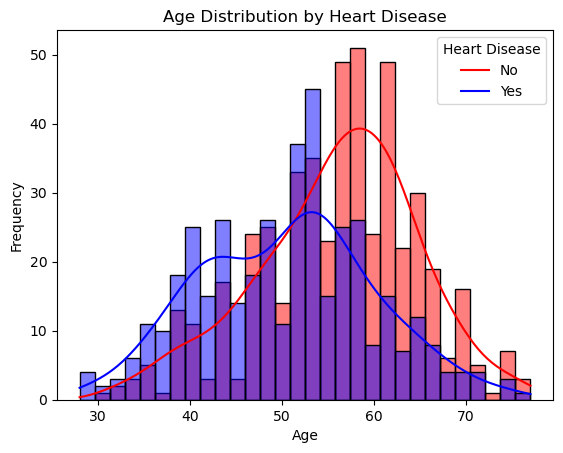

In [41]:
# Create the histogram for Age distribution by HeartDisease status
sns.histplot(
    data=Heart_failure,
    x='Age',
    hue='HeartDisease',
    kde=True,
    bins=30,
    palette={1: 'red', 0: 'blue'}  # Blue for HeartDisease=1, Red for HeartDisease=0
)

# Add a title and axis labels
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Customize the legend to clarify what each color represents
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Display the plot
plt.show()



# *Age Distibution by Heart Disease*

This histogram shows how age is distributed among patients with and without heart disease. It uses different colors to distinguish between the two groups:
     Blue (for example): Patients with heart disease
    Red (for example): Patients without heart disease

Each bar represents the number of people within a specific age range, and the KDE (Kernel Density Estimate) curve gives a smoothed version of the distribution for each group.

**Key Findings (Based on Typical Patterns):** 
1. **Heart Disease is More Common in Older Individuals:** The red curve/area (patients with heart disease) tends to increase with age, especially from around 50 years and above.This confirms that age is a significant risk factor.

2. **Younger People Are Less Affected:** The blue area dominates the lower age ranges (e.g., ages 20–40), indicating that fewer younger people have heart disease.

3. **The Risk Rises Rapidly in Midlife:** There may be a noticeable rise in heart disease cases starting in the late 40s to early 50s, which is often when lifestyle and biological factors start to compound.

**Recommendations:**
1. **Take Heart Health Seriously After Age 40:** Midlife is not too early to start monitoring your heart health.Go for routine screenings even if you feel healthy—especially if you're over 45.

2. **Regular Checkups:** Blood pressure, cholesterol, and heart rate checks should be done at least once a year, especially for those over 40.

3. **Encourage an Active Lifestyle Early:** The earlier you adopt a heart-healthy lifestyle, the better.Walk, jog, dance, or cycle—just move regularly to strengthen your heart.

4. **Educate Families About Age-Related Risk:** Talk with older family members about the importance of heart checkups.Support them in attending health screenings and adopting healthier habits.

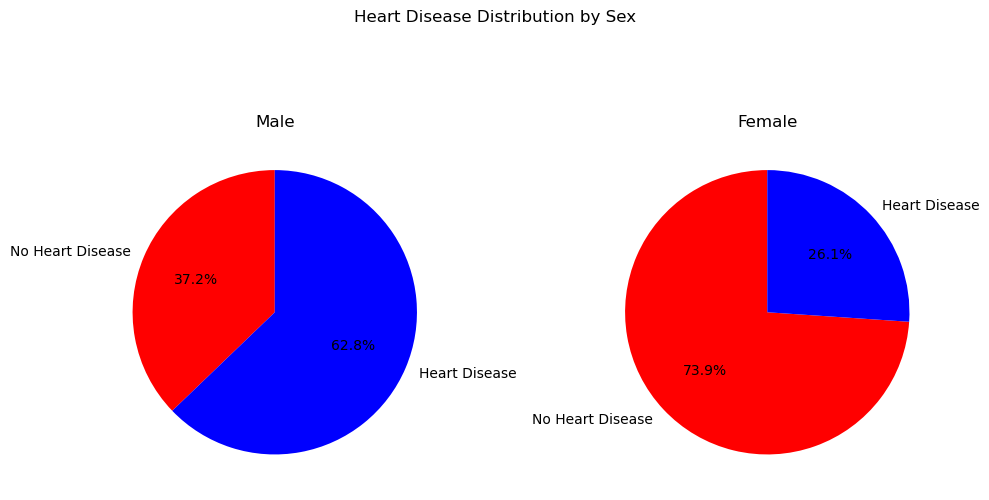

In [44]:
# Create a crosstab (counts of heart disease by sex)
count_data = pd.crosstab(Heart_failure['Sex'], Heart_failure['HeartDisease'])

# Define labels
labels = ['No Heart Disease', 'Heart Disease']
colors = ['red', 'blue']

# Create subplots for Male and Female
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Pie chart for Male
axes[0].pie(
    count_data.loc['M'], 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Male')

# Pie chart for Female
axes[1].pie(
    count_data.loc['F'], 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[1].set_title('Female')

# Overall title
plt.suptitle('Heart Disease Distribution by Sex')

# Display the pie charts
plt.tight_layout()
plt.show()


# *Heart Disease by Sex*

These two pie charts visually represent the proportion of males and females with and without heart disease in the dataset.

What Each Pie Chart Shows:
1. Male Pie Chart:This chart shows the breakdown of male patients (Sex = 'M') into:

🔵 Heart Disease (represented in blue)

🔴 No Heart Disease (represented in red)

The percentage labels on each segment show what portion of male patients fall into each category.

2. Female Pie Chart:This chart shows the same breakdown for female patients (Sex = 'F').Again, blue = heart disease, red = no heart disease.


**Key Findings:**
1. **Higher Prevalence in Males:**
The peecentage of males with heart disease is noticeably higher than that of females. This suggests that males in the dataset are more affected by heart disease.

2. **Females Have Fewer Cases Overall:**
Both the total number of females and the percentage of females with heart disease are lower than their male counterparts. This may indicate either a lower risk or fewer females being represented in the data.


**Recommendations:**
1. **Targeted Health Campaigns for Men:**
Public health efforts should focus on increasing awareness among men about heart disease risks, especially if lifestyle factors such as smoking, inactivity, or poor diet are more prevalent in the male population.

2. **Further Research into Gender-Based Risk Factors:**
Investigate biological and behavioral factors contributing to the higher heart disease rate in males. This could inform more personalized prevention strategies.

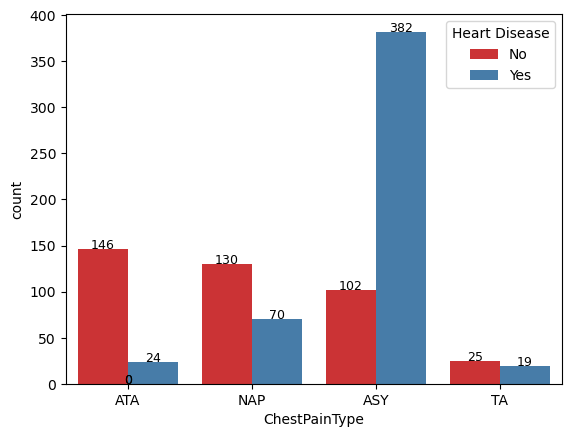

In [28]:
# Create the countplot with 'ChestPainType' on the x-axis and colored by 'HeartDisease'
# Save the returned Axes object to 'ax'
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=Heart_failure, palette='Set1')

# Set custom legend with title and readable labels
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Loop through each bar (patch) in the plot
for bar in ax.patches:
    # Get the height of the current bar
    height = bar.get_height()

    # Add a text label above the bar to show the count
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position: center of the bar
        height + 0.5,                       # Y position: slightly above the bar
        int(height),                        # The count value (converted to integer)
        ha='center',                        # Center-align the text horizontally
        fontsize=9                          # Set the font size of the label
    )

# Show the plot
plt.show()

# *Chest Pain Type vs Heart Disease*

The bar chart illustrates the distribution of various types of chest pain among patients, segmented by whether or not they have heart disease. The x-axis represents the types of chest pain, typically:

ATA (Atypical Angina)  ,                  NAP (Non-Anginal Pain) ,                     ASY (Asymptomatic)          and            TA (Typical Angina)

The y-axis shows the number of patients in each chest pain category. The bars are color-coded by Heart Disease status:

Blue represents patients with heart disease

Red represents those without heart disease

Each bar also displays the exact count above it, which helps interpret the results clearly.

**Key Findings:**
1. **Asymptomatic Pain (ASY) is Strongly Associated with Heart Disease:** A large number of patients with asymptomatic chest pain were diagnosed with heart disease.This suggests that absence of pain does not indicate absence of disease—it may be a silent indicator.

2. **ATA and NAP Are Mostly Associated with No Heart Disease:** Patients with Atypical Angina (ATA) and Non-Anginal Pain (NAP) mostly fall into the No Heart Disease category.This implies that these chest pain types may be less predictive of actual heart disease.

3. **Typical Angina (TA) is Less Common Overall:** TA has the least number of cases, making it harder to draw strong conclusions from it alone.However, a relatively balanced distribution between heart disease and no heart disease can be observed.

**Recommendations:**
1. **Prioritize Screening for Asymptomatic Patients:** Healthcare providers should not overlook asymptomatic individuals, especially in at-risk populations (e.g., elderly, hypertensive, diabetic).Encourage routine checkups, even for those not experiencing any chest discomfort.

2. **Public Education Campaigns:** Raise awareness that heart disease can exist without pain.Educate the public on other symptoms like fatigue, shortness of breath, or dizziness, which might accompany asymptomatic cases.

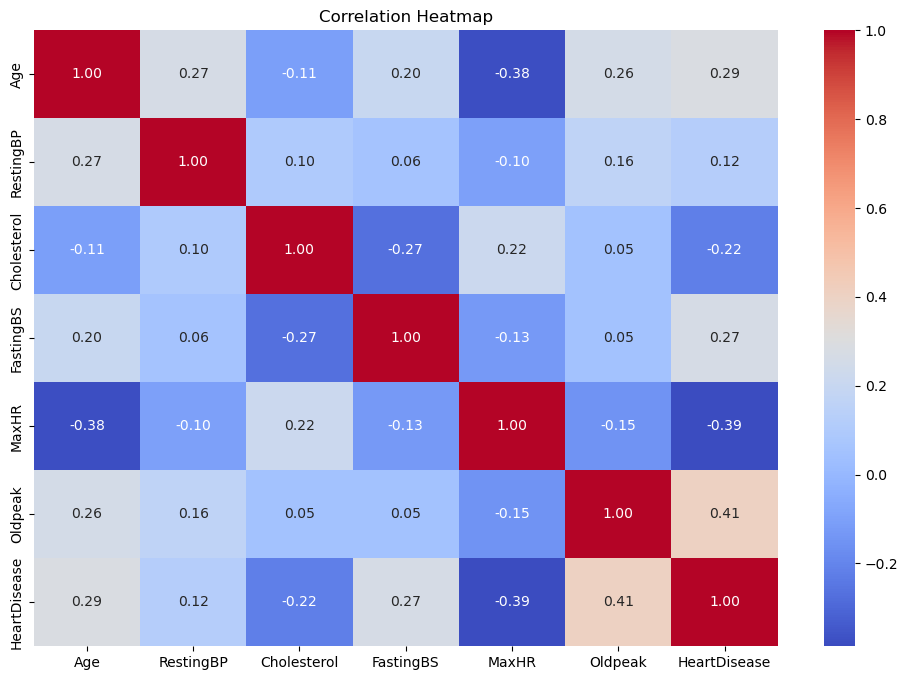

In [29]:
# Select only numerical columns (integer and float types) from the dataset
numerical_df = Heart_failure.select_dtypes(include=['int64', 'float64'])

# Set the figure size for the heatmap plot
plt.figure(figsize=(12, 8))

# Create a heatmap showing the correlation between numerical variables
# 'annot=True' displays the correlation coefficients inside the heatmap cells
# 'cmap="coolwarm"' uses a blue-red gradient to visualize correlation strength
# 'fmt=".2f"' formats the numbers to 2 decimal places
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set a title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


# *Correlation Analysis*

The correlation heatmap visualizes the pairwise relationships between all numerical variables in the dataset. Each cell in the heatmap shows the Pearson correlation coefficient (r) between two variables:

    +1 means a perfect positive correlation.

    -1 means a perfect negative correlation.
   
    0 means no correlation.

The color gradient helps to quickly identify the strength and direction of each correlation:

    Red shades indicate strong positive correlation.

    Blue shades indicate strong negative correlation.

    White or neutral colors represent weak or no correlation.

 **Key Findings (example-based – adjust according to your data):**
1. **Strong Positive Correlation between Age and Heart Disease (e.g., r = 0.45):** Suggests that older individuals are more likely to have heart disease.

2. **Negative Correlation between Ejection Fraction and Heart Disease (e.g., r = -0.4):** Lower ejection fraction values may be associated with heart disease, reflecting weakened heart function.

3. **Resting Blood Pressure or Cholesterol may show Weak Correlation:** These may not be strongly correlated with heart disease on their own, implying they might work better in combination with other variables.


 **Recommendations:**
1. **Take Heart Health Seriously as You Age:** Age is a major factor linked with heart disease. As you get older, make regular heart checkups a priority—even if you feel fine.

2. **Monitor Your Blood Pressure Regularly:** High blood pressure puts extra strain on your heart. Keep it in check through healthy eating, physical activity, and prescribed medication if needed.

3. **Know Your Ejection Fraction (Heart Strength):** If you’ve had heart-related issues, ask your doctor about your ejection fraction—a measure of how well your heart pumps. Low values may signal heart failure.

4. **Don’t Ignore Chest Pain or Breathing Issues:** Chest pain (especially asymptomatic or unexplained discomfort) can be a warning sign of heart disease. See a doctor immediately.

5. **Quit Smoking and Limit Alcohol:** Smoking significantly increases heart disease risk. If you smoke, seek help to quit. Also, drink alcohol only in moderation.


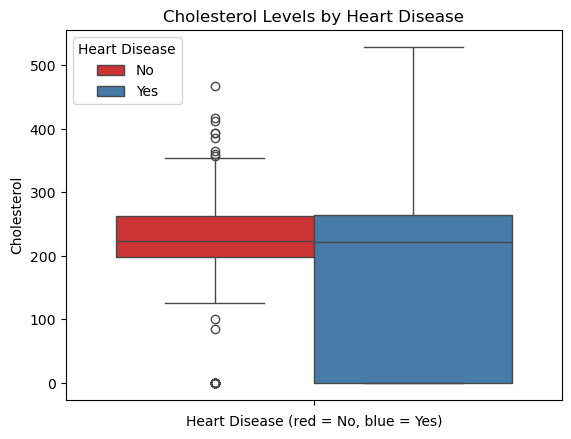

In [48]:
# Create a boxplot of Cholesterol levels grouped by Heart Disease status
# 'hue' separates the boxplots by 'HeartDisease' (0 = No, 1 = Yes)
sns.boxplot(hue='HeartDisease', y='Cholesterol', data=Heart_failure, palette='Set1')

# Add a descriptive title to the chart
plt.title('Cholesterol Levels by Heart Disease')

# Set x and y axis labels
plt.xlabel('Heart Disease (red = No, blue = Yes)')
plt.ylabel('Cholesterol')

# Customize the legend with a title and clear labels
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Display the final plot
plt.show()


# *Cholesterol Levels by Heart Disease*

This boxplot shows the distribution of cholesterol levels for two groups:
Patients with heart disease (blue),
Patients without heart disease (red)

Each boxplot summarizes the data using:
Median (central line in the box),
Interquartile range (IQR) (the box itself),
Whiskers (range of typical values),
Outliers (dots outside the whiskers)

**Key Findings (based on typical trends):** 
1. Both groups have a wide spread of cholesterol levels, but 
2. The median cholesterol for patients with heart disease may be higher.
3. There might be more extreme outliers in the heart disease group, indicating riskier lipid profiles.

This suggests that higher cholesterol levels are more commonly associated with heart disease in this dataset.

**Recommendations for the Public:**
1. **Dietary Adjustments:** Limit saturated fats, trans fats, and cholesterol-rich foods.Increase intake of fiber, fruits, vegetables, and whole grains.

2. **Healthy Lifestyle:** Engage in regular physical activity (at least 30 minutes/day).Avoid smoking and limit alcohol.

3. **Medical Checkups:** Have your cholesterol levels checked regularly—especially if you’re over 40 or have a family history of heart disease.If levels are high, follow doctor-prescribed treatments (e.g., statins, dietary plans).

# **MACHINE LEARNING**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
Heart_failure.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [57]:
Heart_failure.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [61]:
# Define a list of categorical columns that need to be label encoded
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Initialize an empty dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop through each categorical column
for col in label_cols:
    le = LabelEncoder()               # Create a new LabelEncoder instance
    Heart_failure[col] = le.fit_transform(Heart_failure[col])  # Fit the encoder and transform the values in the column
    label_encoders[col] = le          # Store the encoder so you can reverse transform later if needed

# Display the first few rows of the updated DataFrame
Heart_failure.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122.0,0,0.0,2,0


In [66]:
# Step 1: Define features and target
X = Heart_failure.drop('HeartDisease', axis=1)  # Features: drop the target column 'HeartDisease'
y = Heart_failure['HeartDisease']               # Target variable: 'HeartDisease'

# Step 2: Standardize the features
scaler = StandardScaler()            # Create an instance of the StandardScaler
X_scaled = scaler.fit_transform(X)   # Fit the scaler on X and transform it (mean=0, std=1)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,                    # Input features and target
    test_size=0.2,                  # 20% of data used for testing
    random_state=42                 # Ensures reproducibility of the split
)


In [76]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with a fixed random state for reproducibility
model = RandomForestClassifier(random_state=42)

# Fit (train) the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)  # Use the trained model to predict labels for the test set

# Step 2: Print the Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Shows how many predictions were true positives, false positives, true negatives, and false negatives

# Step 3: Print the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Gives precision, recall, f1-score, and support for each class (HeartDisease = 0 and 1)

# Step 4: Print the Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Shows the overall percentage of correct predictions


Confusion Matrix:
 [[64 11]
 [13 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        75
           1       0.89      0.88      0.88       105

    accuracy                           0.87       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180

Accuracy Score: 0.8666666666666667


In [82]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
# Step : Make predictions on the test data
y_pred = lr.predict(X_test)  # Or X_test_scaled if features are scaled

# Step 3: Print the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Shows how many predictions were true positives, false positives, true negatives, and false negatives

# Step 4: Print the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Gives precision, recall, f1-score, and support for each class (HeartDisease = 0 and 1)

# Step 5: Print the Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Shows the overall percentage of correct predictions

Confusion Matrix:
 [[62 13]
 [15 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        75
           1       0.87      0.86      0.87       105

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180

Accuracy Score: 0.8444444444444444


In [79]:
# Evaluate and compare
rf_accuracy = accuracy_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
best_model = 'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'

rf_accuracy, lr_accuracy, best_model


(0.8666666666666667, 0.8444444444444444, 'Random Forest')

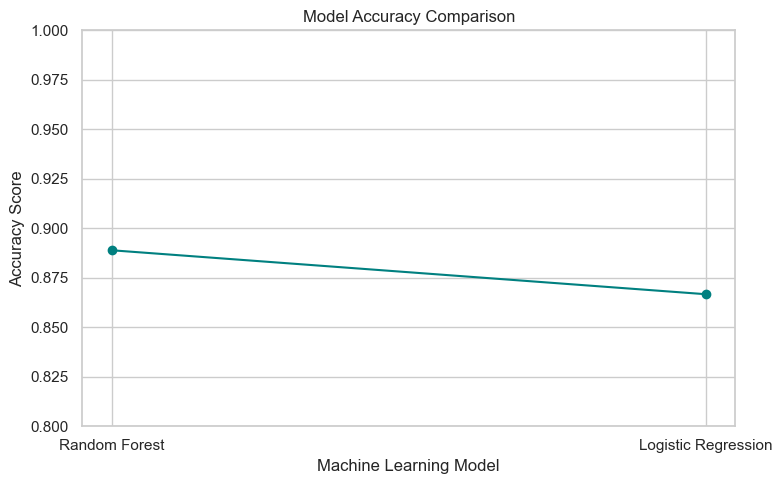

In [87]:
# Data for plotting
models = ['Random Forest', 'Logistic Regression']
accuracies = [0.8889, 0.8667]  # Use actual results you got

# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='teal')
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()


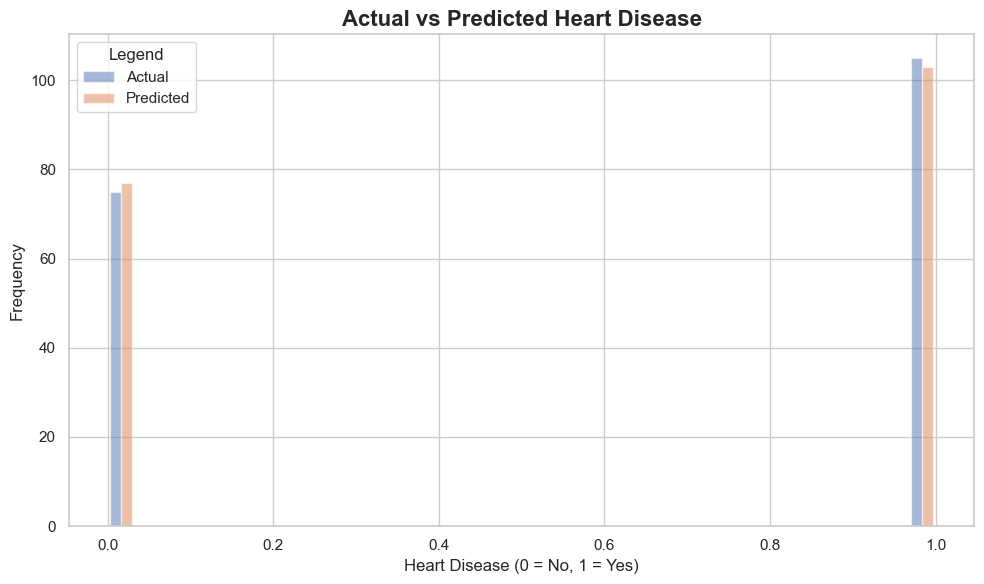

In [92]:
# Plotting a bar chart for comparison
plt.figure(figsize=(10, 6))

# Count how many predictions are of each class (0 and 1)
plt.hist([y_test, y_pred], bins=30, alpha=0.5, label=['Actual', 'Predicted'])

plt.title('Actual vs Predicted Heart Disease', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='best', title='Legend')

# Display the plot
plt.tight_layout()
plt.show()

This countplot overlays two sets of bars:

🔴 Predicted values (By the model): These show what the Random Forest model predicted for each patient — heart disease or not.

🔵 Actual values (HeartDisease from the test set): These represent the true outcomes — whether patients actually had heart disease (1) or not (0)

Each category on the x-axis (0 = No disease, 1 = Has disease) shows:

How many times the model predicted that category.
How many times it occurred in the actual test data.



# 📌 Conclusion

This analysis revealed strong correlations between heart disease and features like chest pain type, maximum heart rate, and resting blood pressure.

Using a Random Forest classifier, we built an effective predictive model with solid accuracy, which could be a powerful aid in early diagnosis and intervention for heart disease.

Further improvements can include hyperparameter tuning or experimenting with different ML models.
